<h1 style='background:DarkSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          border: 2px solid Lavender;
          font-family:cursive;
          text-align:center'><b>MNIST 🔢 – Getting with start image preprocessing & CV with PyTorch <img width="15" height="20" src='https://i.imgur.com/IvbSjzm.png'/></b></h1>

<center>
    <img src='https://i.imgur.com/fgb7eXs.jpeg'>
</center>

Copyright [2022] [AI Engineer: [Ahmed](https://www.kaggle.com/dsxavier/)]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# 📖<font size='5' color='DarkViolet'>Overview</font>

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

# 📝<font size='5' color='DarkViolet'>Acknowledgments</font>

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

# 📝<font size='5' color='DarkViolet'>Proof of Work</font>

**MNIST** considers being the first case study the scientists start doing their experiments on it during the 70s, and now it is one of the essential datasets that most scientists are using to verify their networks. 

If you want to start exploring the field of image processing and computer vision **(CV)**, you start from the right place. 

It is not just working on code more than exploring the field with you, guys. I would like to put what I have learnt into this kernel step by step so that we can come up with something simple and efficient to show you how beautiful this field is and how it can help you in further industries. Thank you for following up with my work!

# 📚<font size='5' color='DarkViolet'>Data Dictionary</font>

The data files `train.csv` and `test.csv` contain **gray-scale images of hand-drawn digits**, <u>from zero through nine</u>.

Each image is **28 pixels in height and 28 pixels** in width, for a total of **784 pixels** in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between <u>0 and 255, inclusive</u>.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```markdown
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```markdown
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

# 🔖<font size='5' color='DarkViolet'>Dependencies</font>

In [1]:
%config Completer.use_jedi = False

# <font size='4' color='MediumSlateBlue'><b>(A) Install Dependencies</b></font>

In [2]:
!pip3 install -q graphviz
!pip install -q -U git+https://github.com/waleedka/hiddenlayer.git

# <font size='4' color='MediumSlateBlue'><b>(B) Import Libraries</b></font>

In [3]:
import os
import warnings
import math
import re
import time
import json
import random as python_random

from IPython.display import clear_output, display
from itertools import product
from collections import namedtuple, OrderedDict
from typing import OrderedDict, Text, Optional, Union, List, NamedTuple, Tuple
from numbers import Number
from tqdm.auto import tqdm
from tqdm.auto import trange

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score, 
                             confusion_matrix,
                             auc,
                             roc_auc_score,
                             classification_report,
                             ConfusionMatrixDisplay)

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import hiddenlayer as hl
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pylab as plt

torch.set_printoptions(linewidth=150)
%matplotlib inline

**Main Params for Matplotlib**

In [4]:
plt.rcParams['figure.figsize'] = [18, 15]
plt.style.use('fivethirtyeight')

**Main Params for Seaborn**

In [5]:
plt.rcParams['figure.figsize'] = [18, 15]
plt.style.use('fivethirtyeight')

**Tabular Data Configuration**

In [6]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

# <font size='4' color='MediumSlateBlue'><b>(C) Hardware Specifications</b></font>

In [7]:
# https://stackoverflow.com/a/20354129/14473118
import multiprocessing
pool = multiprocessing.Pool()
print(f'Number of workers for parallelism: {pool._processes}')

Number of workers for parallelism: 2


In [8]:
!nvidia-smi

Fri Apr 15 20:27:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

# <font size='5' color='DarkSlateBlue'>1. Data Preparation</font>

- we will start with preparaing the data. To prepare our data, we will be following what is loosely known as an [ETL process](https://en.wikipedia.org/wiki/Extract,_transform,_load)

- **Extract** data from a data source.
- **Transform** data into a desirable format.
- **Load** data into a suitable structure.

# <font size=4 color='SteelBlue'> (A) Extract, Transform, and Load (ETL)</font>

 For these purposes, PyTorch provides us with two classes: 

<table>
<thead>
  <tr>
    <th>Class</th>
    <th>Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>torch.utils.data.Dataset</td>
    <td>An abstract class for representing a dataset.</td>
  </tr>
  <tr>
    <td>torch.utils.data.DataLoader</td>
    <td>Wraps a dataset and provides access to the underlying data.</td>
  </tr>
</tbody>
</table>

**Adding Control seed**

In [9]:
# Controlling random samples
def set_seed():
    np.random.seed(123)
    python_random.seed(123)
    torch.manual_seed(1234)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(1234)
set_seed()

### (I) Extract

In [10]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

In [11]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [13]:
images = train_data.loc[:, train_data.columns != 'label']
label = train_data.loc[:, 'label']

In [14]:
images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
np.unique(images.to_numpy())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### (II) Transform

#### <font size=4 color='DeepSkyBlue'><a href='https://deeplizard.com/learn/video/lu7TCu7HeYc'>Data Normalization</a></font>

The idea of data [normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) is an general concept that refers to the act of transforming the original values of a dataset to new values. The new values are typically encoded relative to the dataset itself and are scaled in some way.

We're going to use `transforms.Normalize`. We need the `mean` and `std` of the dataset so we can apply the normalization.

**what is the point of doing that?**

Our goal is to normalize the range of the colours in the dataset from [0, 255] to be in mean in **zero** and **std** on **1**. **Standard Deviation** summarises the data and controls the spread of the data, thus we would have higher accuracy!



In [17]:
images.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
def normalization(images: pd.DataFrame) -> Tuple[int, int]:
    # let's get the number of pixels of our dataset
    num_of_pixels = len(images) * len(images.columns.values.tolist()) # No. of images * flatten pixels (784)

    # summation of the images' colours
    total_sum = images.to_numpy().sum()

    mean = total_sum / num_of_pixels

    sum_of_squard_error = np.power(images.to_numpy() - mean, 2).sum()
    sum_of_squard_error

    std = np.sqrt(sum_of_squard_error/num_of_pixels)
    return mean, std

In [19]:
print(normalization(images))

(33.408911169825075, 78.677739760763)


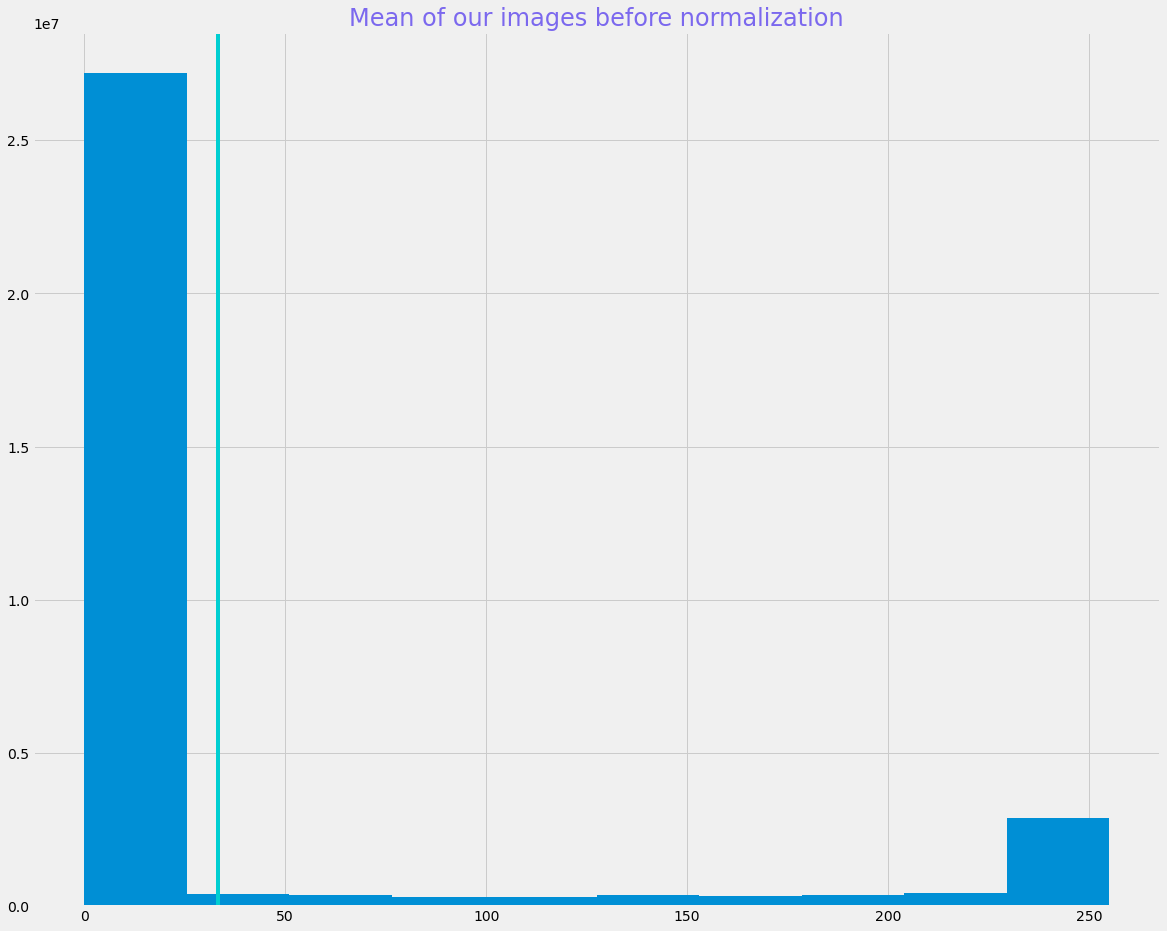

In [20]:
plt.hist(images.to_numpy().flatten())
plt.axvline(images.to_numpy().mean(), color='DarkTurquoise')
plt.title('Mean of our images before normalization', fontsize=24, color='MediumSlateBlue')
plt.show()

As we can see in the plot, the **mean** is `~33.4` and **standard deviation** is `~78.67`, which is not good at all. Let's try to normalize our data and see the `mean` and `std` again! 

Let's split our dataset into train, validation

In [21]:
(train_images, valid_images,
 train_label, valid_label) = train_test_split(images, 
                                label,
                                test_size=0.3,
                                random_state=123,
                                stratify=label) 

<p style='background:MintCream;
          border-radius: 25px;
          padding: 20px;
          color:MediumSlateBlue;
          font-size:14px;
          font-family:Times New Roman;
          border: 2px solid Lavender;
          text-align:center'><b>To know more about <b>Stratify</b> and why we used it, you can visit <a href='https://www.kaggle.com/code/dsxavier/titanic-how-data-scientist-applies-analysis-ml#2.-Train-&-Test-Split' color="white">Titanic - How Data Scientist applies Analysis & ML – 
2. Train & Test Split</a></b></p>



Initialize the **Transformer** – this allows us to create various tasks simultaneously without overloading the data into multiple processes. For more info. [Transforms](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html)

In [22]:
len(train_images), len(valid_images), len(train_label), len(valid_label)

(29400, 12600, 29400, 12600)

In [23]:
# obtain mean, and std from our dataset
train_normalization_values = normalization(train_images)
valid_normalization_values = normalization(valid_images)

In [24]:
def transform(images: np.ndarray,
              normalization_values: float) -> torch.Tensor:
    transformer = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(*normalization_values)
                    ])
    return transformer(images)

tensor_train_images = transform(train_images.to_numpy().astype(np.float64), train_normalization_values)
tensor_valid_images = transform(valid_images.to_numpy().astype(np.float64), valid_normalization_values)

In [25]:
tensor_train_images

tensor([[[-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         ...,
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244]]], dtype=torch.float64)

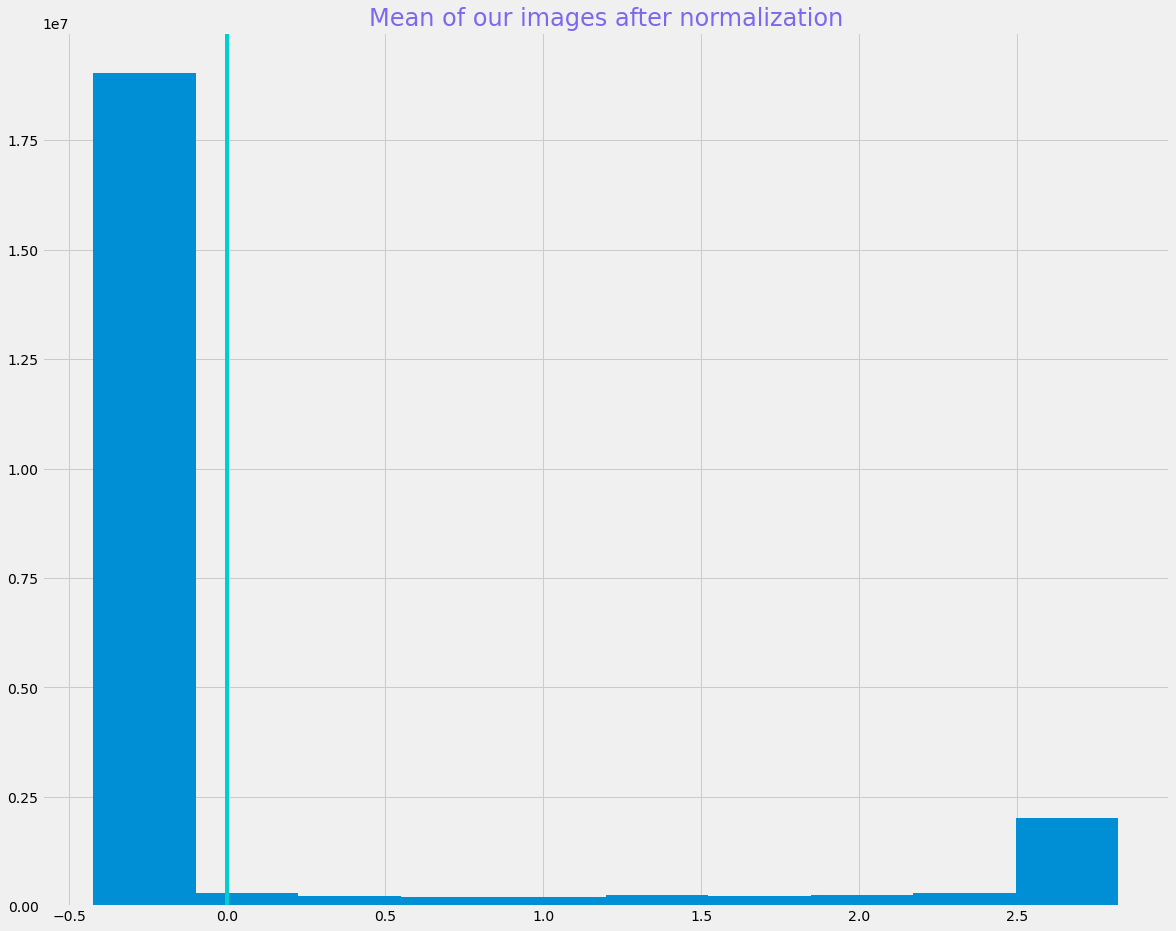

In [26]:
plt.hist(tensor_train_images.numpy().flatten())
plt.axvline(tensor_train_images.numpy().mean(), color='DarkTurquoise')
plt.title('Mean of our images after normalization', fontsize=24, color='MediumSlateBlue')
plt.show()

Now, we have our images' colours normalized and ready to load!

### (III) Load

In [27]:
torch.from_numpy(train_label.to_numpy()).shape

torch.Size([29400])

In [28]:
tensor_train_images.shape

torch.Size([1, 29400, 784])

First, we're going to build our dataset using `torch.utils.data.TensorDataset` for representing our `train_dataset` and `validation_dataset`.

In [29]:
train_dataset = torch.utils.data.TensorDataset(tensor_train_images.squeeze(0),
                                               torch.from_numpy(train_label.to_numpy()))
valid_dataset = torch.utils.data.TensorDataset(tensor_valid_images.squeeze(0),
                                               torch.from_numpy(valid_label.to_numpy()))

# <font size='5' color='DarkSlateBlue'>2. Data Analysis</font>

Here, we're going to analyse our dataset and check the proportion and balance of our dataset. 

# <font size=4 color='SteelBlue'><b>(A) Analysing images</b></font>


In [30]:
len(train_dataset)

29400

In [31]:
train_dataset.tensors

(tensor([[-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         ...,
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244],
         [-0.4244, -0.4244, -0.4244,  ..., -0.4244, -0.4244, -0.4244]], dtype=torch.float64),
 tensor([5, 2, 5,  ..., 1, 3, 1]))

Let's check the number of samples in each class. It is important to have the same length of examples in each class

In [32]:
train_dataset.tensors[1].bincount()

tensor([2892, 3279, 2924, 3046, 2850, 2656, 2896, 3081, 2844, 2932])

It seems like our dataset is **unbalanced dataset**.

<a href='https://arxiv.org/abs/1710.05381'>**A systematic study of the class imbalance problem in convolutional neural networks4**</a>

> *The default version of oversampling is to increase the number of cases in the minority classes
so that the number matches the majority classes. Similarly, the default of undersampling is to
decrease the number of cases in the majority classes to match the minority classes. However,
a more moderate version of these algorithms could be applied. For the case of MNIST with
imbalance ratio of 1 000 we have tried to gradually decrease the imbalance with oversampling
and undersampling.*

<p style='background:MediumSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          font-family:cursive;
          border: 2px solid Lavender;
          text-align:center'><b>Number of samples per class</b></p>

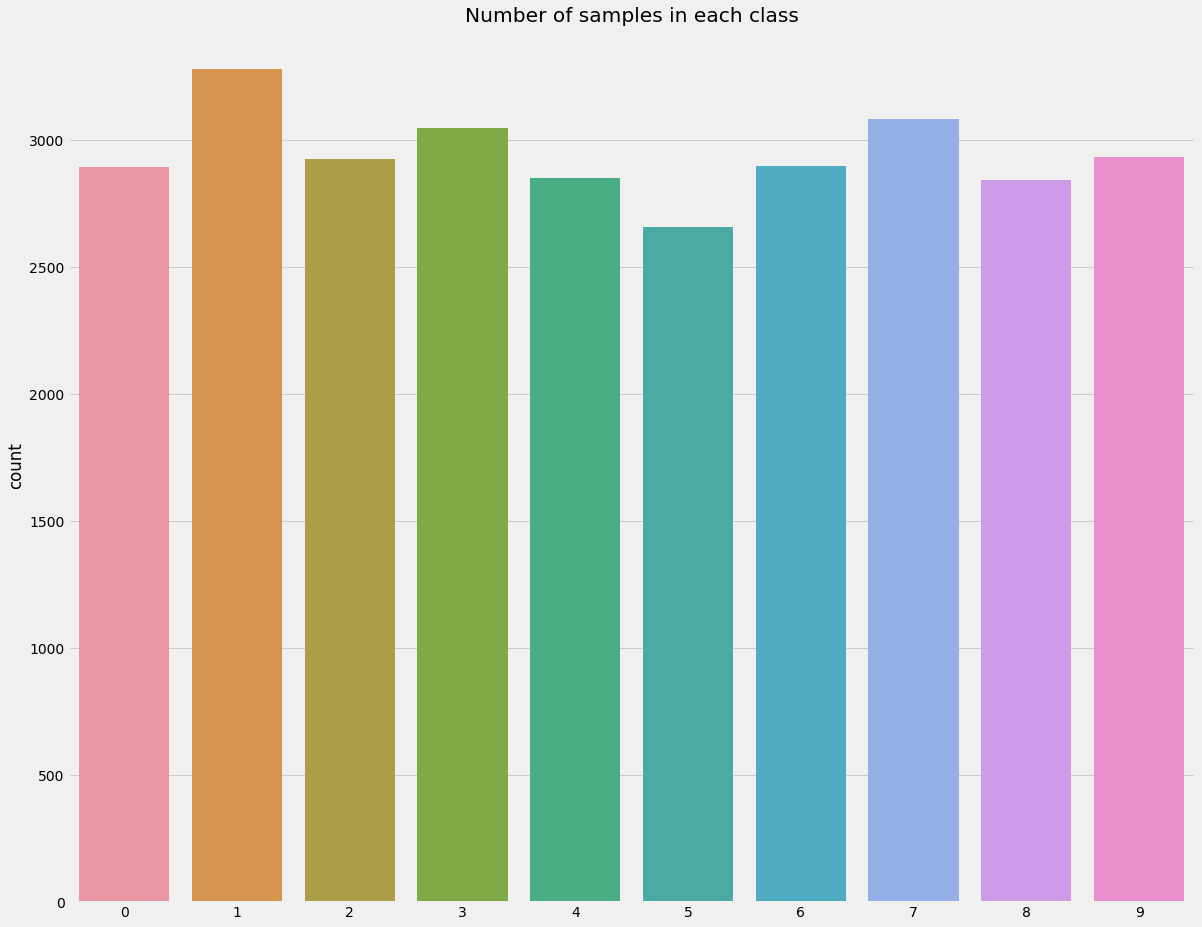

In [33]:
plt.title('Number of samples in each class')
sns.countplot(x=train_dataset.tensors[1].numpy())
plt.show()

Let's check our images

<p style='background:MediumSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          font-family:cursive;
          border: 2px solid Lavender;
          text-align:center'><b>Random samples from MNIST Dataset</b></p>

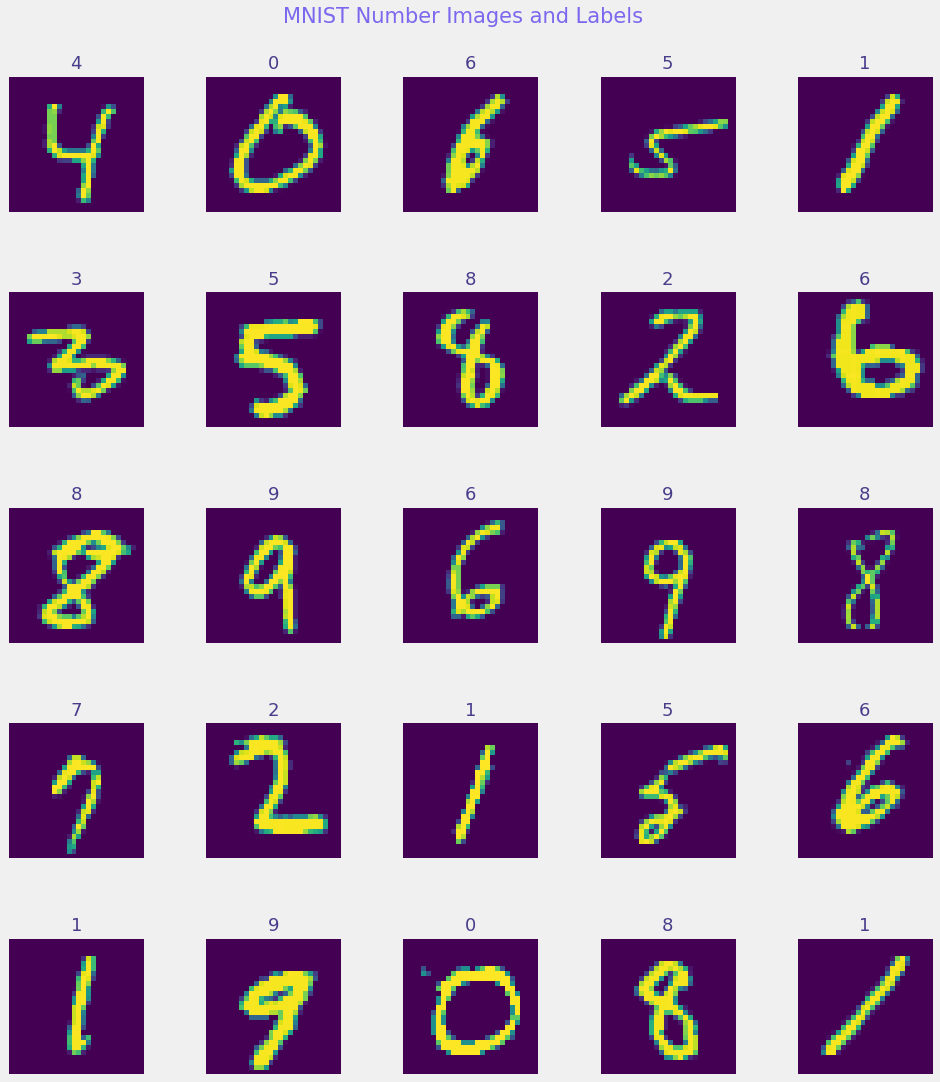

In [34]:
fig, axis = plt.subplots(5, 5, figsize=(14, 16))

fig.suptitle('MNIST Number Images and Labels', fontsize=21, color='MediumSlateBlue')
fig.tight_layout(pad=1.6)
# flatten the multi-dimentionality of `subplots`
axis = axis.ravel()

for i in range(25):
    sample = python_random.randint(0, len(train_dataset))
    axis[i].imshow(train_dataset[sample][0].numpy().reshape(28, 28))
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)
    axis[i].set_title(train_dataset[sample][1].numpy(),
                      fontsize=18, color='DarkSlateBlue')
plt.subplots_adjust(hspace=0.2)

# <font size=4 color='SteelBlue'><b>(B) Analysing Model layers</b></font>

For Analysing Model layers – the **PyTorch** debugging system is different compared with **TensorFlow**. It is beneficial because we can test our layers on our images and see the effect of each layer on our image. Our images are in the same dimensionality so that we won't face any issues if we choose the right layers to build our network.

First, I need to know if **MaxPooling** would affect our images. Our images are small in size, and as we know **MaxPooling** considers reducing the size of the images.

In [35]:
train_dataset[0][0].shape

torch.Size([784])

Let's check the image that we're going to work with

<p style='background:MediumSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          font-family:cursive;
          border: 2px solid Lavender;
          text-align:center'><b>Exprimenting with MaxPooling</b></p>

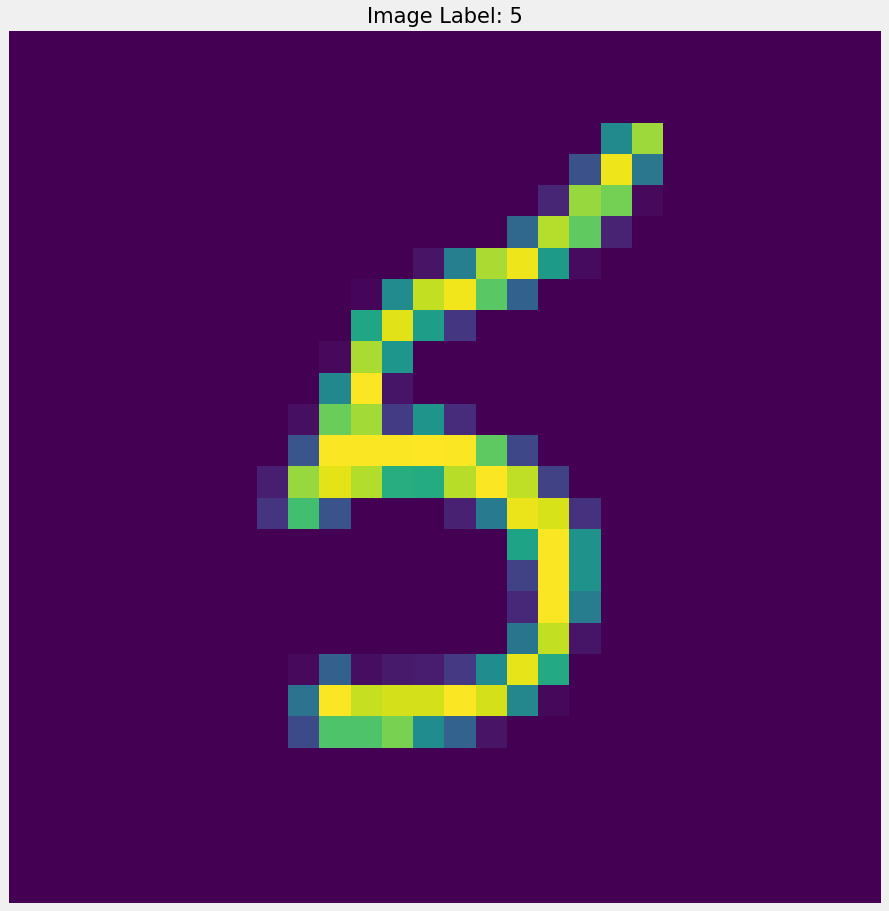

In [36]:
plt.title(f"Image Label: {train_dataset[0][1]}", fontsize=21)
plt.imshow(train_dataset[0][0].reshape(28, 28), interpolation=None)
plt.grid(False)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

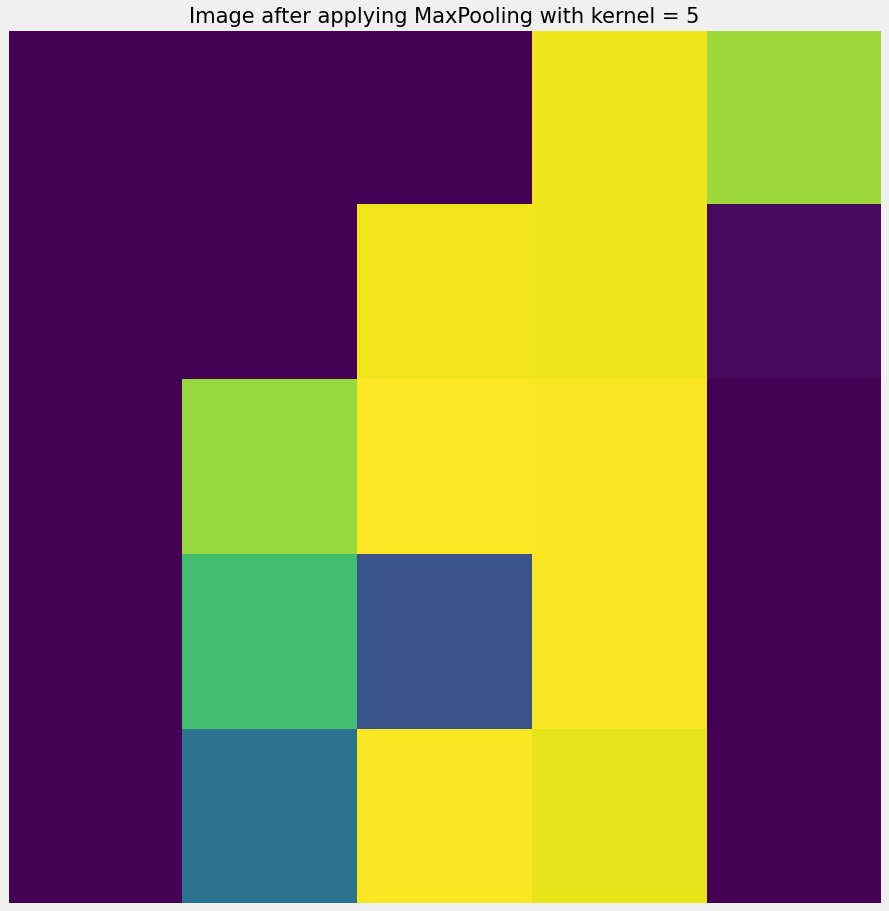

In [37]:
maxpooling = nn.MaxPool2d(kernel_size=5)
plt.imshow(maxpooling(train_dataset[0][0].reshape(1, 28, 28)).squeeze(0))
plt.title(f"Image after applying MaxPooling with kernel = 5", fontsize=21)
plt.grid(False)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

**That's interesting...**

We can see that the image after the **max-pooling** has been corrupted. This corruption leads to misclassification. Therefore, it is better not to use **Maxpooling** in our network.

Let's change the `kernel_size`

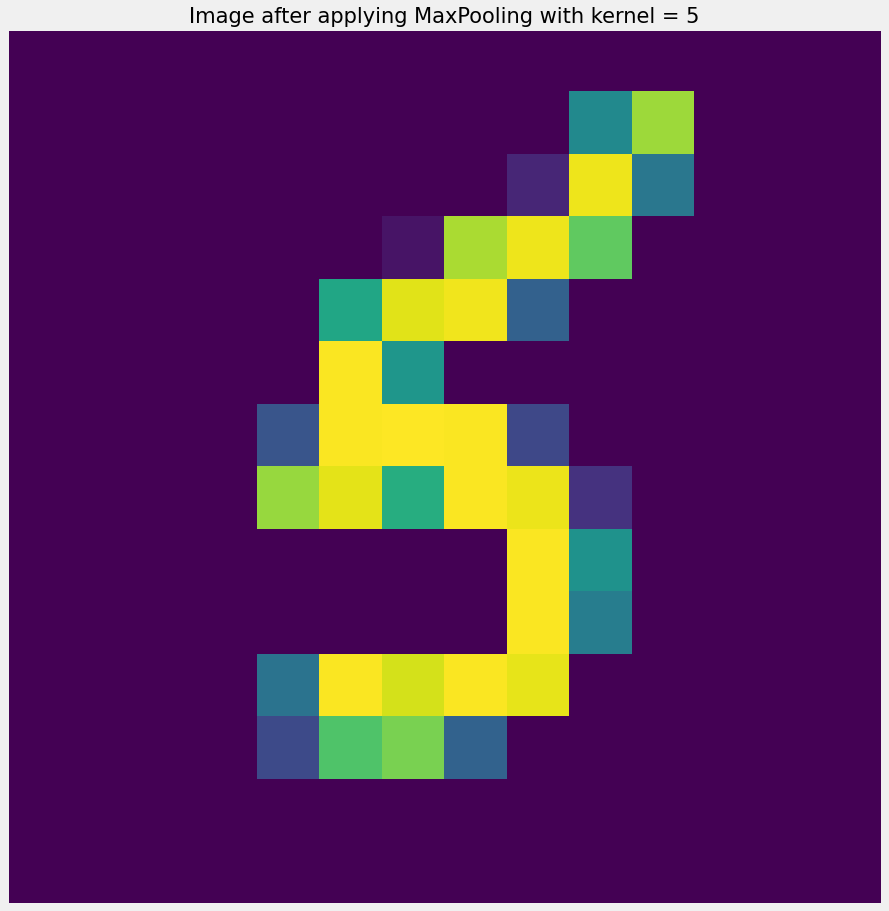

In [38]:
maxpooling = nn.MaxPool2d(kernel_size=2)
plt.imshow(maxpooling(train_dataset[0][0].reshape(1, 28, 28)).squeeze(0))
plt.title(f"Image after applying MaxPooling with kernel = 5", fontsize=21)
plt.grid(False)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

Let's check the proper `kernel_size` for the convolution layer

As we know, the input to our **CNN Network** has to be in shape of `4d Tensor` – this indicates the [batch, n_channels, height, width]

To convert our image from `3d Tensor` to `4d Tensor` of one image, we `unsqueeze` to give us batch with `1` size, or by using `reshape`.

In [39]:
train_dataset[0][0].reshape(1, 1, 28, 28).shape

torch.Size([1, 1, 28, 28])

**Convolution Layer** has to provide <u>6 different types of channels</u> based on the <u>one channel</u> that we're going to provide, let's see how it will display 6 different channels from our image. This task has to show us if the `kernel_size` that we provide will affect the image or not.

In [40]:
conv1 = nn.Conv2d(in_channels=1,
                  out_channels=6,
                  kernel_size=5)

conv1(train_dataset[0][0].reshape(1, 1, 28, 28).float()).detach().shape

torch.Size([1, 6, 24, 24])

<p style='background:MediumSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          font-family:cursive;
          border: 2px solid Lavender;
          text-align:center'><b>Exprimenting with Convolution Layer</b></p>

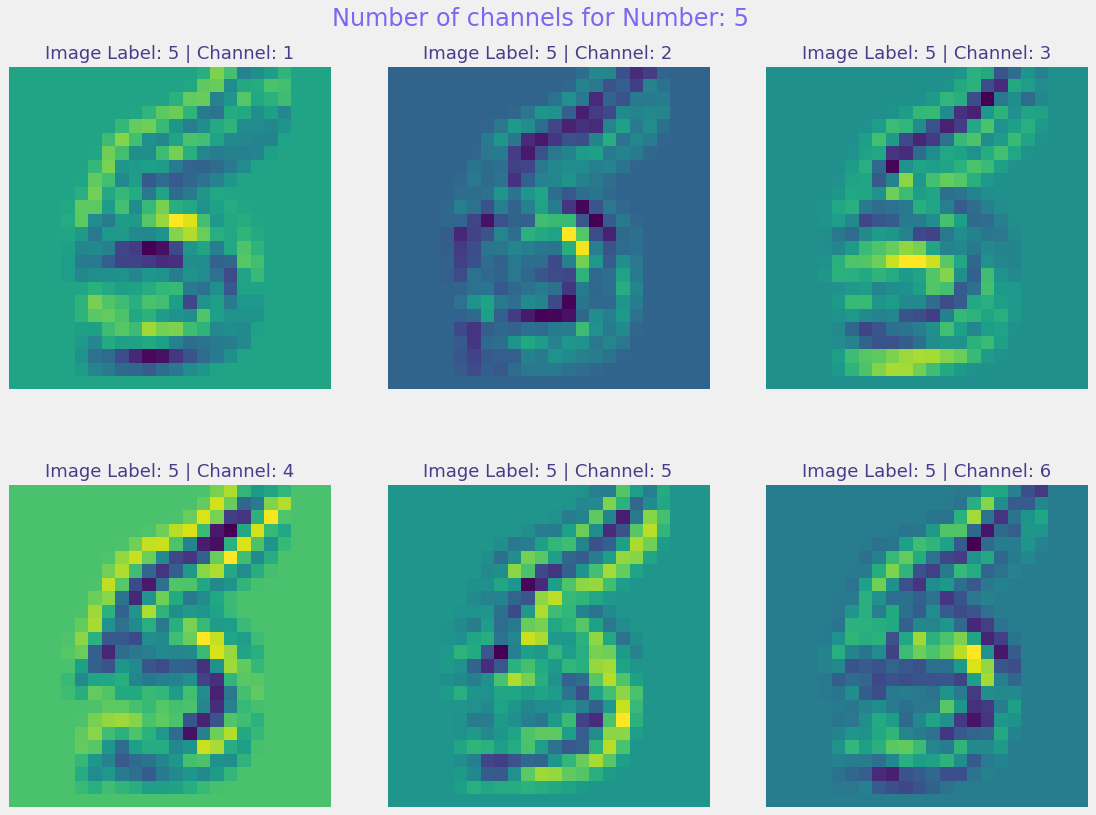

In [41]:
fig, axis = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle(f'Number of channels for Number: {train_dataset[0][1].detach().numpy()}',
             fontsize=24, color='MediumSlateBlue')

fig.tight_layout(pad=1.2)

# flatten the multi-dimentionality of `subplots`
axis = axis.ravel()
for i in range(6):
    axis[i].imshow(conv1(train_dataset[0][0].reshape(1, 1, 28, 28).float()).detach().squeeze(0)[i])
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)
    axis[i].set_title(f"Image Label: {train_dataset[0][1].numpy()} | Channel: {i+1}",
                      fontsize=18, color='DarkSlateBlue')
plt.subplots_adjust(hspace=0.2)

# <font size='5' color='DarkSlateBlue'>3. Modelling</font>

# <font size=4 color='SteelBlue'><b>(A) Building Model</b></font>


- Let's now build our model. Since we're going to build two models for a testing network with `with_maxpooling` and `without_maxpooling`.

In [42]:
class NetworkFactory:
    @staticmethod # running without creating class instance
    def get_network(name):
        if name == 'with_MaxPooling':
            return nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.BatchNorm2d(num_features=6), # It is important for prevent exploring the gradient by normalizing the weights
                nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Flatten(start_dim=1),
                nn.Linear(in_features= 12 * 4 * 4, out_features=120),
                nn.ReLU(),
                nn.BatchNorm1d(num_features=120),
                nn.Linear(in_features=120, out_features=60),
                nn.ReLU(),
                nn.Linear(in_features=60, out_features=10)
            )
        elif name == 'without_MaxPooling':
            return nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
                nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=2, stride=2),
                nn.BatchNorm2d(num_features=6), # It is important for prevent exploring the gradient by normalizing the weights
                nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
                nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Flatten(start_dim=1),
                nn.Linear(in_features= 12 * 20 * 20, out_features=120),
                nn.ReLU(),
                nn.BatchNorm1d(num_features=120),
                nn.Linear(in_features=120, out_features=60),
                nn.ReLU(),
                nn.Linear(in_features=60, out_features=10)
            )

#### ***Analysing our Network***

Now, let's take it step by step and see how did we end up with `Linear(12 * 4 * 4, 120)` or  `Linear(12 * 20 * 20, 120)`?

First, we need to visualize one of the models that we created, then we're going to move in into each of the CNN layers, mathematically.

For visualizing our model in **PyTorch** – there's no directed way to do that, but on the other hand, this gives us the capability to play with our model smoothly.

We're going to use a GitHub repository called [HiddenLayer](https://github.com/waleedka/hiddenlayer). 

I'm impressed by what these guys were able to contribute to bringing us these tools in their package.

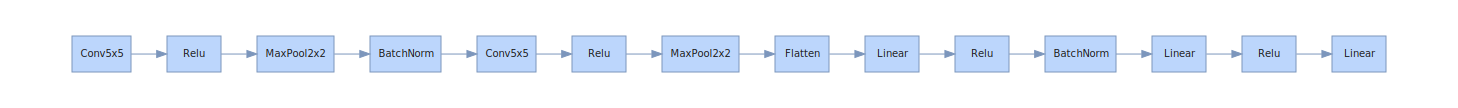

In [43]:
warnings.filterwarnings('ignore')
# https://stackoverflow.com/a/62458882/14473118
trans = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
hl_graph = hl.build_graph(NetworkFactory.get_network('with_MaxPooling'),
                          train_dataset[:3][0].reshape(3, 1, 28, 28).float(),
                          transforms=trans)

hl_graph.theme = hl.graph.THEMES["blue"].copy()
hl_graph

Starting from the image – we converted its flattened values into 3 dimensions `(n_channels, height, width)`, then we sent it to the first **Convolution Layer**, which takes 4 dimensions `(batch_size, n_channels, height, width)`.

<center style='font-size:21px'>$\frac{n \text{ -} f \text{ + } 2\times\text{ p}}{s}+1$</center>

**Convolution Layer No.01**:

--> Input: image (28px, 28px)

--> Process: <font size='4'>$\frac{size\_pixels \text{ -} kernel\_size \text{ + } 2\times\text{ padding}}{stride}+1= \frac{28 \text{ -} 5 \text{ + } 2\times\text{ 0}}{1}+1 = 24px$</font>

--> Output: image (24px, 24px)

**MaxPool No. 01**:

--> Input: image (24px, 24px)

--> Process: <font size='4'>$\frac{size\_pixels \text{ -} kernel\_size \text{ + } 2\times\text{ padding}}{stride}+1= \frac{24 \text{ -} 2 \text{ + } 2\times\text{ 0}}{2}+1 = 12px$</font>

--> Output: image (12px, 12px)

**Convolution Layer No.02**:

--> Input: image (12px, 12px)

--> Process: <font size='4'>$\frac{size\_pixels \text{ -} kernel\_size \text{ + } 2\times\text{ padding}}{stride}+1= \frac{12 \text{ -} 5 \text{ + } 2\times\text{ 0}}{1}+1 = 8px$</font>

--> Output: image (8px, 8px)

**MaxPool No. 02**:

--> Input: image (8px, 8px)

--> Process: <font size='4'>$\frac{size\_pixels \text{ -} kernel\_size \text{ + } 2\times\text{ padding}}{stride}+1= \frac{8 \text{ -} 2 \text{ + } 2\times\text{ 0}}{2}+1 = 4px$</font>

--> Output: image (4px, 4px)

**Flatten**:

--> Input: image (4px, 4px)

--> process: flatten vector :- 4*4 = 16

**Linear**:

--> in_features: 12 `n_channels`, 16 flatten image

--> Process: 12 * 16 = 192

 --> Output: 120


# <font size=4 color='SteelBlue'><b>(B) Building Run Builder</b></font>

- This module will allow us to run multiple trials.

In [44]:
class RunBuilder:
    @staticmethod
    def get_runs(params: OrderedDict[Text,
                                     Optional[Union[Number,
                                                    Text]]]) -> List[NamedTuple]:
        # take each key in the dict and add it as a class name for Run
        Run = namedtuple('Run', params.keys())
        
        # a list that reserves all the combinations from the product module out of the
        ## params dict.
        runs = []
        for value in product(*params.values()):
            runs.append(Run(*value))
        
        return runs

# <font size=4 color='SteelBlue'><b>(C) Training Loop Refactoring</b></font>

- This phase aims to have an encapsulated Run Manager that helps us to clear the complexity in our Huperparameter and Monitoring Phase and also be able to help us to trace all the information we need without affecting the structure of our code.

#### ***Variable Refactoring***

In [45]:
class Epoch:
    def __init__(self) -> None:
        self.count = 0
        self.best_epoch = 0
        self.loss = 0
        self.num_correct = 0
        self.f1_score = 0
        self.roc_auc = 0
        self.cm = []
        self.start_time = 0

In [46]:
class Run:
    def __init__(self) -> None:
        self.params = None
        self.count = 0
        self.best_run = 0
        self.data = []
        self.start_time = None
        self.num_workers = 0

In [47]:
class Evaluate:
    def __init__(self) -> None:
        self.loss = 0
        self.num_correct = 0
        self.best_accuracy = 0
        self.f1_score = 0
        self.best_f1 = 0
        self.roc_auc = 0
        self.cm = []

#### ***Visualization Canvas***

In [48]:
class MyCanvas(hl.Canvas):
    """Extending Canvas to add a pie chart method."""

    def draw_image(self, metric, limit=3):
        """Display a series of images at different time steps."""
        rows = 2
        cols = limit
        self.ax.axis("off")
        self.ax.set_title('Convolution Layer Channels',
                          fontsize=18,
                          color='DarkSlateBlue',
                          pad=30)
        
        self.figure.tight_layout(pad=1.2)
        # Take the Axes gridspec and divide it into a grid
        gs = gridspec.GridSpecFromSubplotSpec(
                rows, cols, subplot_spec=self.gs)
        
        # Loop through images in last few steps
        for i in range(rows * cols):
            ax = self.figure.add_subplot(gs[i])
            ax.axis('off')
            ax.set_title(f'Channel: {i+1}', fontsize=14, color='MediumSlateBlue')
            ax.imshow(metric.data[-1][i])
    
            
    def draw_pie(self, metric, val_metric):
        # Method name must start with 'draw_' for the Canvas to automatically manage it
        # Use the provided matplotlib Axes in self.ax
        self.ax.axis("off")
        self.ax.set_title('Accuracy of the training & validation datasets',
                          fontsize=18,
                          color='DarkSlateBlue',
                          pad=30)
        # Get latest value of the metric
        value = np.clip(metric.data[-1], 0, 1)
        val_value = np.clip(val_metric.data[-1], 0, 1)
        
        # Take the Axes gridspec and divide it into a grid
        gs = gridspec.GridSpecFromSubplotSpec(
                1, 2, subplot_spec=self.gs)
        
        ax1 = self.figure.add_subplot(gs[0])
        ax2 = self.figure.add_subplot(gs[1])
        
        # Draw accuracy pie chart
        ax1.pie([value, 1-value],
                labels=["Accuracy", ""],
                autopct='%1.1f%%')
        
        ax2.pie([val_value, 1-val_value],
                labels=["Val_Accuracy", ""],
                autopct='%1.1f%%')
    
    def draw_confusion_matrix(self, cm_matric, val_cm_matric):
        # Use the provided matplotlib Axes in self.ax
        self.ax.axis("off")
        self.ax.set_title('Plotting Confusion Matrix',
                          fontsize=18,
                          color='DarkSlateBlue',
                          pad=30)
        # https://stackoverflow.com/a/57452776/14473118
        cm = cm_matric.data[-1]
        norm_cm = np.round(cm / cm.sum(axis=1)[:np.newaxis], 3)
        val_cm = val_cm_matric.data[-1]
        norm_valid_cm = np.round(val_cm / val_cm.sum(axis=1)[:np.newaxis], 3)
        
        # Take the Axes gridspec and divide it into a grid
        gs = gridspec.GridSpecFromSubplotSpec(1, 2,
                                              subplot_spec=self.gs,
                                              hspace=0.2,
                                              wspace=0.6,
                                              width_ratios=[21, 21])
        
        self.figure.tight_layout(pad=1.2)
        self.figure.set_size_inches(14, 18)
        ax1 = self.figure.add_subplot(gs[0])
        ax2 = self.figure.add_subplot(gs[1])
        
        self.figure.gca().invert_yaxis()
        
        
        ax1.set_title('Training Confusion Matrix',
                      fontsize=14,
                      color='MediumSlateBlue',
                      pad=10)
        ax1.grid(False)
        sns.heatmap(norm_cm,
                    vmin=0,
                    vmax=1,
                    square=True,
                    cmap="Blues",
                    linewidths=0.1,
                    annot=True,
                    annot_kws={"fontsize":8},
                    ax=ax1)
        
        ax1.set_xticklabels(list(range(0, 10)))
        ax1.set_yticklabels(list(range(0, 10)))
        
        ax2.set_title('Validation Confusion Matrix',
                      fontsize=12,
                      color='MediumSlateBlue',
                      pad=10)
        ax2.grid(False)
        sns.heatmap(norm_valid_cm,
                    vmin=0,
                    vmax=1,
                    square=True,
                    cmap="Blues",
                    linewidths=0.3,
                    annot=True,
                    annot_kws={"fontsize":8},
                    ax=ax2)
        ax2.set_xticklabels(list(range(0, 10)))
        ax2.set_yticklabels(list(range(0, 10)))
        
        plt.gcf().set_tight_layout(True)

#### ***Run Manager***

In [49]:
class RunManager:
    def __init__(self) -> None:
        self.epoch = Epoch()
        self.run = Run()
        self.eval = Evaluate()
        
        self.device = None
        self.network = None        
        self.best_network = None
        
        self.train_loader = None
        self.eval_loader = None
        
    def begin_run(self, run, network, train_loader, eval_loader, device) -> None:
        self.run.start_time = time.time()
        
        self.run.params = run
        self.run.count += 1
        
        self.device = device
        self.network = network
        self.network.canvas = MyCanvas()
        self.network.history = hl.History()
        
        self.train_loader = train_loader
        self.eval_loader = eval_loader
        
    def end_run(self) -> None:
        self.epoch.count = 0
    
    def begin_epoch(self) -> None:
        self.epoch.start_time = time.time()
        self.epoch.count += 1

        self.epoch.loss = 0
        self.epoch.num_correct = 0
        self.epoch.f1_score = 0
        self.epoch.roc_auc = 0
        self.epoch.cm = []

        self.eval.loss = 0
        self.eval.num_correct = 0        
        self.eval.f1_score = 0
        self.eval.roc_auc = 0
        self.eval.cm = []
    
    def end_epoch(self) -> None:
        epoch_duration = time.time() - self.epoch.start_time
        run_duration = time.time() - self.run.start_time
        
        loss = self.epoch.loss / len(self.train_loader.dataset)
        accuracy = self.epoch.num_correct / len(self.train_loader.dataset)
        f1 = (self.epoch.f1_score / len(self.train_loader.dataset)) * self.train_loader.batch_size
        roc_auc = (self.epoch.roc_auc / len(self.train_loader.dataset)) * self.train_loader.batch_size
        cm = np.sum(np.array(self.epoch.cm), 0)

        # =====  Evaluate our network ===== #
        self.evaluate(self.device)
        val_loss = self.eval.loss / len(self.eval_loader.dataset)
        val_accuracy = self.eval.num_correct / len(self.eval_loader.dataset)
        val_f1 = (self.eval.f1_score / len(self.eval_loader.dataset)) * self.train_loader.batch_size
        val_roc_auc = (self.eval.roc_auc / len(self.eval_loader.dataset)) * self.train_loader.batch_size
        val_cm = np.sum(np.array(self.eval.cm), 0)
        
        ## Check the best model
        if (val_accuracy >= self.eval.best_accuracy) and (val_f1 >= self.eval.best_f1):
            self.eval.best_accuracy = val_accuracy
            self.eval.best_f1 = val_f1
            self.epoch.best_epoch = self.epoch.count
            self.run.best_run = self.run.count
            self.best_network = self.network
            
        # ===== Adding the Statistics & Summary ===== #
        # Logging loss and accuracy
        self.network.history.log((self.epoch.count, run.batch_size),
                                 loss=loss,
                                 accuracy=accuracy,
                                 val_accuracy=val_accuracy,
                                 cm=cm,
                                 val_cm=val_cm,
                                 conv1_weight=self.network[0].weight.data.permute(0, 2, 3, 1))
                
        # ===== Tracing our training loop performace ===== #
    
        results = OrderedDict()
        results['run'] = self.run.count
        results['epoch'] = self.epoch.count
        results['loss'] = loss
        results['val_loss'] = val_loss
        results['accuracy'] = accuracy
        results['val_accuracy'] = val_accuracy
        results['f1'] = f1
        results['val_f1'] = val_f1
        results['roc'] = roc_auc
        results['val_roc'] = val_roc_auc
        results['epoch duration'] = epoch_duration
        results['run duration'] = run_duration
        
        
        # adding our hyperparameters to the results' dictionary
        for key, value in self.run.params._asdict().items(): results[key] = value
        
        if not torch.cuda.is_available():
            results['device'] = 'cpu'
        
        
        # Append all these information inside the run list to display
        self.run.data.append(results)
        
        # Display the results data using pandas dataframe
        df = pd.DataFrame.from_dict(self.run.data,
                                    orient='columns').style.background_gradient(cmap='ocean')
        
        # Clean the kernel every end of epoch to display the update
        clear_output(wait=True)
        # Display
        with self.network.canvas:
            self.network.canvas.draw_pie(self.network.history["accuracy"],
                                         self.network.history["val_accuracy"])
            self.network.canvas.draw_confusion_matrix(self.network.history['cm'],
                                                      self.network.history['val_cm'])
            self.network.canvas.draw_plot([self.network.history["accuracy"],
                                           self.network.history["loss"]])
            self.network.canvas.draw_image(self.network.history["conv1_weight"])
        display(df)
        
    def trace_loss(self, loss) -> None:
        self.epoch.loss += loss.item() * self.train_loader.batch_size

    def eval_trace_loss(self, loss) -> None:
        self.eval.loss += loss.item() * self.eval_loader.batch_size
        
    def trace_num_correct(self, pred, labels) -> None:
        self.epoch.num_correct += self._get_num_correct(pred, labels)

    def eval_trace_num_correct(self, pred, labels) -> None:
        self.eval.num_correct += self._get_num_correct(pred, labels)
    
    
    @torch.no_grad()
    def _get_num_correct(self, pred, labels):
        return pred.argmax(dim=1).eq(labels).sum().item()
    
    @torch.no_grad()
    def scores(self,
               pred: torch.Tensor,
               labels: torch.Tensor,
               mode: str='TRAIN') -> None:
        
        if mode == 'TRAIN':
            self.epoch.f1_score += f1_score(labels.cpu().detach().numpy(),
                                            torch.argmax(pred, dim=1).cpu().detach().numpy(),
                                            average='macro')
            
            self.epoch.roc_auc += roc_auc_score(labels.cpu().detach().numpy(),
                                                F.softmax(pred).cpu().detach().numpy(),
                                                average="macro",
                                                multi_class='ovr')
            
            self.epoch.cm.append(confusion_matrix(labels.cpu().detach().numpy(),
                                            torch.argmax(pred, dim=1).cpu().detach().numpy(),
                                            labels=list(range(0, 10))).tolist())
            
        elif mode == "EVAL":
            self.eval.f1_score += f1_score(labels.cpu().detach().numpy(),
                                           torch.argmax(pred, dim=1).cpu().detach().numpy(),
                                           average='macro')

            self.eval.roc_auc += roc_auc_score(labels.cpu().detach().numpy(),
                                               F.softmax(pred).cpu().detach().numpy(),
                                               average="macro",
                                               multi_class='ovr')
            self.eval.cm.append(confusion_matrix(labels.cpu().detach().numpy(),
                                            torch.argmax(pred, dim=1).cpu().detach().numpy(),
                                            labels=list(range(0, 10))).tolist())
            
    @torch.no_grad()
    def evaluate(self, device) -> None:
        self.network.eval()
        for batch in self.eval_loader:
            images = batch[0].float().to(device)
            labels = batch[1].to(device)
            
            # Calculate logits
            logits = self.network(images)

            # Calculate Loss
            loss = F.cross_entropy(logits, labels)
            
            # calculate the performace
            self.eval_trace_loss(loss)
            self.eval_trace_num_correct(logits, labels)
            self.scores(logits, labels, mode='EVAL')

    def save(self, filename: Text) -> None:
        # Save training report
        if not os.path.isdir('training_report'):
            os.mkdir('training_report')
        
        if not os.path.isdir('model'):
            os.mkdir('model')

        print('Saving the best model...')
        # Save Model
        torch.save(self.best_network, f'model/model_run_{self.run.best_run}_epoch_{self.epoch.best_epoch}_val_accuracy_{round(self.eval.best_accuracy, 3)}_val_f1_{round(self.eval.best_f1, 3)}.pth')
        print(f"Model saved in model/{os.listdir('model')[0]}")
        # save as CSV
        pd.DataFrame.from_dict(
            self.run.data, orient='columns',
        ).to_csv(f'training_report/{filename}.csv', index=False)
        
        # save as JSON
        with open(f'training_report/{filename}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run.data, f, ensure_ascii=False, indent=2)

#### ***Hyperparameter Initialization***

In [50]:
EPOCH = 8

params = OrderedDict(
    lr = [5e-3, 1e-3, 1e-4],
    batch_size=[100, 500, 1000],
    num_workers=[3],
    device=['cuda'],
    network=['with_MaxPooling', 'without_MaxPooling']
)

# <font size=4 color='SteelBlue'><b>(D) Training & Evaluating</b></font>


<p style='background:MediumSlateBlue;
          border-radius: 25px;
          padding: 20px;
          color:white;
          font-size:21px;
          font-family:cursive;
          border: 2px solid Lavender;
          text-align:center'><b>Training & Validation Visualization</b></p>

In [51]:
train_dataset = torch.utils.data.TensorDataset(tensor_train_images.squeeze(0).view(-1, 1, 28, 28),
                                               torch.from_numpy(train_label.to_numpy()))
valid_dataset = torch.utils.data.TensorDataset(tensor_valid_images.squeeze(0).view(-1, 1, 28, 28),
                                               torch.from_numpy(valid_label.to_numpy()))

len(train_dataset), len(valid_dataset)

(29400, 12600)

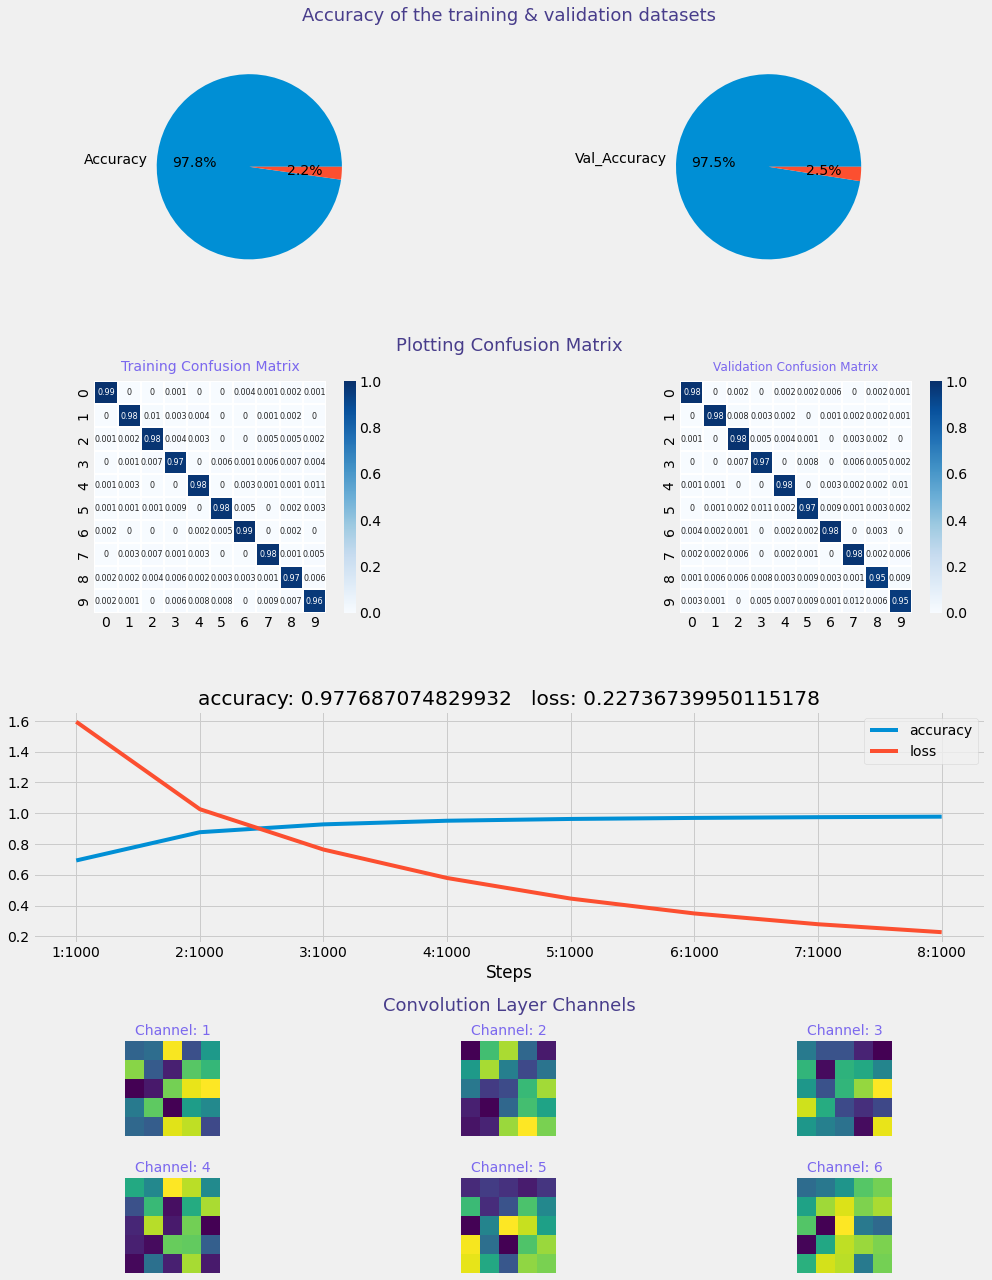

,run,epoch,loss,val_loss,accuracy,val_accuracy,f1,val_f1,roc,val_roc,epoch duration,run duration,lr,batch_size,num_workers,device,network
0,1,1,0.187453,0.069795,0.945952,0.978175,0.942600,0.977616,0.995289,0.999622,10.253870,10.254143,0.005000,100,3,cuda,with_MaxPooling
1,1,2,0.074035,0.088799,0.977211,0.974286,0.975709,0.973634,0.999553,0.999550,4.246954,18.668742,0.005000,100,3,cuda,with_MaxPooling
2,1,3,0.054351,0.077746,0.983810,0.977540,0.982549,0.976868,0.999730,0.999617,3.906640,26.910461,0.005000,100,3,cuda,with_MaxPooling
3,1,4,0.044578,0.076660,0.986156,0.978254,0.985063,0.977329,0.999836,0.999622,4.713156,36.385779,0.005000,100,3,cuda,with_MaxPooling
4,1,5,0.037368,0.074051,0.988605,0.980794,0.987882,0.980080,0.999875,0.999597,3.935010,44.812473,0.005000,100,3,cuda,with_MaxPooling
5,1,6,0.029765,0.086833,0.990646,0.977778,0.990087,0.976228,0.999922,0.999592,4.113121,53.385690,0.005000,100,3,cuda,with_MaxPooling
6,1,7,0.063592,0.144680,0.979354,0.977857,0.978059,0.977141,0.999701,0.998811,4.336353,61.988094,0.005000,100,3,cuda,with_MaxPooling
7,1,8,0.030287,0.093726,0.990510,0.981825,0.989757,0.980948,0.999933,0.999474,4.747048,71.300117,0.005000,100,3,cuda,with_MaxPooling
8,2,1,0.172162,0.094756,0.950544,0.972063,0.946758,0.970682,0.995829,0.999360,4.021084,4.021278,0.005000,100,3,cuda,without_MaxPooling
9,2,2,0.066137,0.082029,0.980034,0.976825,0.978728,0.975921,0.999648,0.999447,3.821878,12.371169,0.005000,100,3,cuda,without_MaxPooling


Saving the best model...
Model saved in model/model_run_10_epoch_7_val_accuracy_0.986_val_f1_1.017.pth
==================================================== Finish the training ====================================================


In [52]:
run_manager = RunManager()
print(' Start the training '.center(100, '='))

for index, run in enumerate(RunBuilder.get_runs(params)):
    ## +++++ [Torch GPU] (1) Detect the device +++++
    if torch.cuda.is_available():
        device= torch.device(run.device)
        ## +++++ [Multiple Training Network] Using NetworkFactory +++++
        network = NetworkFactory().get_network(run.network).to(device)
    else:
        device = torch.device('cpu')
        network = NetworkFactory().get_network(run.network).to(device)
    
    #Initialize the train & eval batches & Optimizer
    train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=run.batch_size,
                                               num_workers=run.num_workers)
    
    eval_loader = torch.utils.data.DataLoader(valid_dataset,
                                               batch_size=run.batch_size,
                                               num_workers=run.num_workers)
    
    optimizer = optim.Adam(network.parameters(), lr=run.lr)
        ## ===== (1) Begin Run =====
    run_manager.begin_run(run, network, train_loader, eval_loader, device)
    
    print(f' Start the training No. [{index+1}] '.center(100, '+'))

    for epoch in range(EPOCH):
        run_manager.network.train()
          ## ===== (2) Begin Epoch =====
        run_manager.begin_epoch()
        
        # Looping for single epoch over total number of batches
        for batch in train_loader:
            images = batch[0].float().to(device)
            labels = batch[1].to(device)

            preds = network(images) # pass batch of images
            loss = F.cross_entropy(preds, labels) # calculate the loss

            optimizer.zero_grad() # reset the gradient accumilation
            loss.backward() # Calculate the gradient along with the network
            optimizer.step() # update the network with the updated gradients

                ## ===== (3) Trace the performance =====
            run_manager.trace_loss(loss)
            run_manager.trace_num_correct(preds, labels)
            run_manager.scores(preds, labels, mode='TRAIN')
            ## ===== (4) End Epoch =====
        run_manager.end_epoch()
        ## ===== (5) End Run =====
    run_manager.end_run()
  ## ===== (6) Save Results =====
run_manager.save('training_report')
print(' Finish the training '.center(125, '='))

***Sort By Accuracy***

In [53]:
pd.DataFrame.from_dict(run_manager.run.data, orient='columns').sort_values('val_accuracy', ascending=False).style.background_gradient(cmap='Blues')

,run,epoch,loss,val_loss,accuracy,val_accuracy,f1,val_f1,roc,val_roc,epoch duration,run duration,lr,batch_size,num_workers,device,network
79,10,8,0.001595,0.051718,0.999932,0.985873,1.003330,1.017091,1.003401,1.031485,1.267493,37.459355,0.001000,500,3,cuda,without_MaxPooling
78,10,7,0.002870,0.052619,0.999796,0.985794,1.003179,1.017354,1.003401,1.031514,2.359896,32.195495,0.001000,500,3,cuda,without_MaxPooling
76,10,5,0.008934,0.051961,0.999082,0.985079,1.002483,1.016718,1.003399,1.031484,1.250866,21.745138,0.001000,500,3,cuda,without_MaxPooling
47,6,8,0.008890,0.056079,0.997585,0.985000,1.017881,1.015956,1.020402,1.031551,1.004968,38.901378,0.005000,1000,3,cuda,without_MaxPooling
59,8,4,0.011429,0.058138,0.996973,0.984683,0.996853,0.984087,0.999985,0.999744,4.011894,29.689844,0.001000,100,3,cuda,without_MaxPooling
21,3,6,0.025359,0.056079,0.991905,0.984603,0.995148,1.016294,1.003346,1.031544,1.205856,25.519253,0.005000,500,3,cuda,with_MaxPooling
71,9,8,0.019922,0.052645,0.995578,0.984444,0.998940,1.015855,1.003361,1.031505,1.364487,38.421243,0.001000,500,3,cuda,with_MaxPooling
22,3,7,0.021173,0.061962,0.993129,0.984127,0.996438,1.015338,1.003366,1.031462,1.216499,30.249722,0.005000,500,3,cuda,with_MaxPooling
70,9,7,0.025379,0.052815,0.994150,0.984127,0.997494,1.014770,1.003340,1.031519,2.019959,33.250978,0.001000,500,3,cuda,with_MaxPooling
50,7,3,0.048070,0.052872,0.985782,0.983810,0.984847,0.983198,0.999791,0.999745,4.534489,22.139297,0.001000,100,3,cuda,with_MaxPooling


We can see that the network `without_MaxPooling` gave better accuracy compared with `with_MaxPooling`.

# <font size=4 color='SteelBlue'><b>(E) Batch Inference</b></font>

- We're going to load the inference data for predictions.

In [54]:
test_images = pd.read_csv('../input/digit-recognizer/test.csv')
test_images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Apply Normalization & Transformation

In [55]:
norm_test_data = normalization(test_images)

In [56]:
tran_nrom_test_data = transform(test_images.to_numpy().astype(np.float64),
                                norm_test_data)

- Prepare test dataset

In [57]:
test_dataset = torch.utils.data.TensorDataset(tran_nrom_test_data.squeeze(0).view(-1, 1, 28, 28))
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=500,
                                          num_workers=1)

In [58]:
next(iter(test_loader))[0].shape

torch.Size([500, 1, 28, 28])

- Import Model

In [59]:
os.listdir('model')

['model_run_10_epoch_7_val_accuracy_0.986_val_f1_1.017.pth']

In [60]:
# Load model
model = torch.load(f=os.path.join('model', os.listdir('model')[0]))
# Add model into device
model.to(device)
# Check the eval structure
model.eval()

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=4800, out_features=120, bias=True)
  (7): ReLU()
  (8): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=120, out_features=60, bias=True)
  (10): ReLU()
  (11): Linear(in_features=60, out_features=10, bias=True)
)

In [61]:
@torch.no_grad()
def batch_predictions(model, test_loader) -> pd.DataFrame:
    
    prediction_list = []
    
    for batch in tqdm(test_loader, desc='Batch Predictions'):
        images = batch[0].float().to(device)
        
        # predict logits: un-normalized data given by the model
        logits = model(images)
        
        # convert logits into real values predictions
        pred = torch.argmax(logits, dim=1).cpu().detach().numpy().tolist()
        
        # add the vector of predictions into a list
        prediction_list += pred
        
    # Read submission csv file to append the prediction inside
    sub_df = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
    sub_df = sub_df.drop(columns='Label', axis=1)
    
    # Convert our list of predictions into pandas csv 
    pred_df = pd.DataFrame(prediction_list, columns=['Label'])

    # Concatenate both dataset
    submission = pd.concat([sub_df, pred_df], axis=1)
    
    # save the sumbission
    submission.to_csv('submission.csv', index=False)
    
    return submission

In [62]:
batch_predictions(model, test_loader)

Batch Predictions:   0%|          | 0/56 [00:00<?, ?it/s]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


<p style='background:LawnGreen;
          border-radius: 25px;
          padding: 20px;
          color:ForestGreen;
          font-size:21px;
          font-family:Times New Roman;
          border: 2px solid Lavender;
          text-align:center'><b>I would be more than happy If you share with me your thoughts in the comments section!!!</b></p>

---

# ※<font size='5' color='DarkViolet'>References</font>

- Course: **[PyTorch - Python Deep Learning Neural Network API](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG)**

- [Digit Recognizer 0.998](https://www.kaggle.com/code/dkurbatovv/digit-recognizer-0-998)

- [10 PyTorch Transformations you need to know!](https://www.analyticsvidhya.com/blog/2021/04/10-pytorch-transformations-you-need-to-know/)

- <a href='https://arxiv.org/abs/1710.05381'>**Mateusz Buda, Atsuto Maki2, Maciej A. Mazurowski, A systematic study of the class imbalance problem in convolutional neural networks, 4.5 Undersampling and oversampling to smaller imbalance ratio, page 14**</a>

- [25 Million Images! [0.99757] MNIST](https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist)

- [
HiddenLayer Training Demo - PyTorch](https://github.com/waleedka/hiddenlayer/blob/master/demos/pytorch_train.ipynb)

<center>
________________________________
</center>

<p style='text-align:center;'>Thanks for reaching this level of expermenting
the idea of</p>
<center><p style='text-align:center;'><b>MNIST 🔢 – Getting with start image preprocessing & CV with PyTorch <img width="10" height="15" src='https://i.imgur.com/IvbSjzm.png'/></b></p></center>
<p style='text-align:center;'>AI Engineer: <a href='https://www.linkedin.com/in/drxavier997/'>Ahmed</a></p>
<p style='text-align:center;'>Created at: 2022-04-08<br>